In [2]:
import json
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Load the extraction rates data
with open('../results/extraction_rates_full_2025-11-17-12-42-41-3911.json', 'r') as f:
    data = json.load(f)

mlp_rates = data['results']['mlp']
mhsa_rates = data['results']['mhsa']
layer_rates = data['results']['layer']
num_layers = data['num_layers']

print(f"Loaded data for {num_layers} layers")
print(f"Number of examples: {data['num_examples']}")
print(f"Stats: {data['stats']}")


Loaded data for 32 layers
Number of examples: 400
Stats: {'examples_processed': 400, 'steps_analyzed': 2400, 'steps_with_correct_final_prediction': 1345}


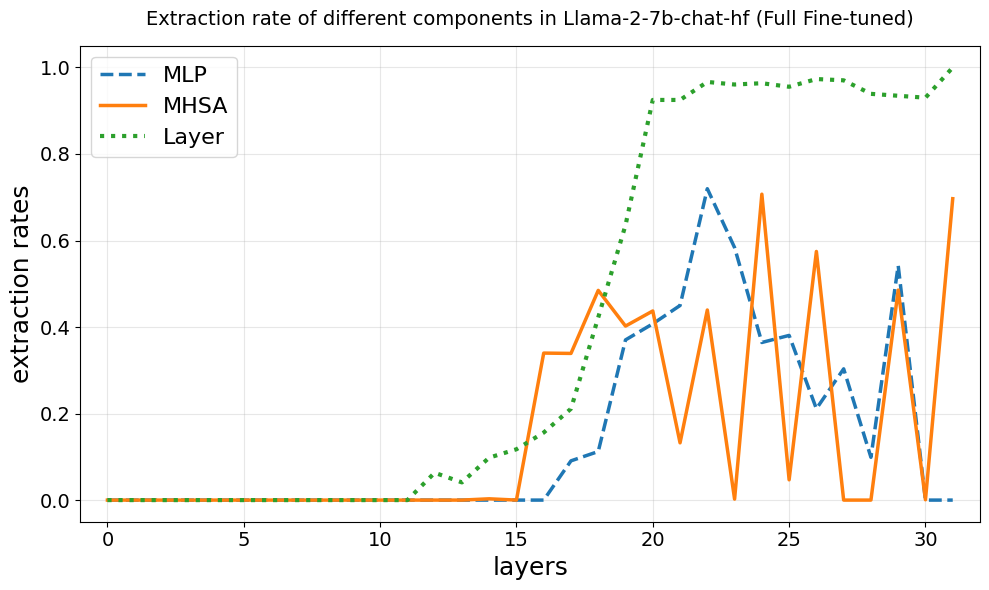

Plot saved to results/extraction_rates_full_plot.png


In [4]:
# Create the plot matching the paper's style
fig, ax = plt.subplots(figsize=(10, 6))

layers = list(range(num_layers))

# Plot with the same colors and styles as Figure 3 in the paper
# MLP: blue dashed line
ax.plot(layers, mlp_rates, '--', linewidth=2.5, label='MLP', color='#1f77b4')

# MHSA: orange solid line
ax.plot(layers, mhsa_rates, '-', linewidth=2.5, label='MHSA', color='#ff7f0e')

# Layer: green dotted line
ax.plot(layers, layer_rates, ':', linewidth=3, label='Layer', color='#2ca02c')

# Formatting to match the paper
ax.set_xlabel('layers', fontsize=18)
ax.set_ylabel('extraction rates', fontsize=18)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=16, loc='upper left')
ax.grid(True, alpha=0.3)
ax.set_ylim(-0.05, 1.05)
ax.set_xlim(-1, num_layers)

plt.title('Extraction rate of different components in Llama-2-7b-chat-hf (Full Fine-tuned)', fontsize=14, pad=15)
plt.tight_layout()

# Save the figure
plt.savefig('../results/extraction_rates_full_plot.png', dpi=300, bbox_inches='tight')
plt.show()

print("Plot saved to results/extraction_rates_full_plot.png")


In [5]:
# Print some key observations
print("\nKey observations:")
print(f"- Layer output extraction rate at final layer: {layer_rates[-1]:.2%}")
print(f"- Peak MHSA extraction rate: {max(mhsa_rates):.2%} at layer {mhsa_rates.index(max(mhsa_rates))}")
print(f"- Peak MLP extraction rate: {max(mlp_rates):.2%} at layer {mlp_rates.index(max(mlp_rates))}")
print(f"\n- MHSA starts extracting at layer: {next((i for i, v in enumerate(mhsa_rates) if v > 0.01), None)}")
print(f"- MLP starts extracting at layer: {next((i for i, v in enumerate(mlp_rates) if v > 0.01), None)}")
print(f"- Layer output reaches >90% at layer: {next((i for i, v in enumerate(layer_rates) if v > 0.9), None)}")



Key observations:
- Layer output extraction rate at final layer: 100.00%
- Peak MHSA extraction rate: 70.71% at layer 24
- Peak MLP extraction rate: 71.97% at layer 22

- MHSA starts extracting at layer: 16
- MLP starts extracting at layer: 17
- Layer output reaches >90% at layer: 20
